In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("netflix_titles.csv")

In [85]:
number_of_rows = df.shape[0]
print("Number of rows:", number_of_rows)

number_of_columns = df.shape[1]
print("Number of columns:", number_of_columns)

Number of rows: 8807
Number of columns: 12


In [86]:
type_=df['type'].unique()
for show_type in type_:
    print(show_type)
    

Movie
TV Show


In [87]:
count_of_type=df.groupby('type').size()
print(count_of_type)

type
Movie      6131
TV Show    2676
dtype: int64


In [88]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [89]:
country_list=df.groupby('country').size()
print(country_list)


country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Length: 748, dtype: int64


In [90]:
rating_list=df.groupby('rating').size()
print(rating_list)


rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64


In [91]:
###Identify and count the unique genres listed in the "listed in" column.

In [92]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [93]:
genres_list=df.groupby('listed_in').size()
print(genres_list)

listed_in
Action & Adventure                                              128
Action & Adventure, Anime Features                                1
Action & Adventure, Anime Features, Children & Family Movies      4
Action & Adventure, Anime Features, Classic Movies                2
Action & Adventure, Anime Features, Horror Movies                 1
                                                               ... 
TV Horror, TV Mysteries, Teen TV Shows                            1
TV Horror, Teen TV Shows                                          2
TV Sci-Fi & Fantasy, TV Thrillers                                 1
TV Shows                                                         16
Thrillers                                                        65
Length: 514, dtype: int64


In [94]:
null_val=df['listed_in'].isnull().any()
print(null_val)

False


In [95]:
#shape of data

In [96]:
df.shape

(8807, 12)

In [97]:
#•	Data types of all the attributes

In [98]:
print( df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [99]:
#Conversion of categorical attributes to 'category' (If required):

In [100]:
categorical_columns = ['type', 'rating', 'duration', 'listed_in']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [101]:
#Missing value detection:

In [102]:
null_columns = df.isnull().any()
print("\nColumns with null values:\n", null_columns)


Columns with null values:
 show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [103]:
#5. Statistical summary

In [104]:
print("\nStatistical summary of numerical columns:\n", df.describe())


Statistical summary of numerical columns:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [105]:
#Non-Graphical Analysis: Value counts and unique attributes ​​


In [106]:
# Value counts for categorical columns
print("\nValue Counts for 'type':\n", df['type'].value_counts())
print("\nValue Counts for 'rating':\n", df['rating'].value_counts())


Value Counts for 'type':
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value Counts for 'rating':
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [107]:
print("\nUnique values in 'release_year':", df['release_year'].unique())
print("\nValue Counts for 'release_year':\n", df['release_year'].value_counts())


Unique values in 'release_year': [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]

Value Counts for 'release_year':
 release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


In [108]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}': {unique_values}")
    print(f"Number of unique values in '{column}': {len(unique_values)}")


Unique values in 'show_id': ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
Number of unique values in 'show_id': 8807

Unique values in 'type': ['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']
Number of unique values in 'type': 2

Unique values in 'title': ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
Number of unique values in 'title': 8807

Unique values in 'director': ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
Number of unique values in 'director': 4529

Unique values in 'cast': [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, 

In [109]:
type_counts = df['type'].value_counts()
print("Type Counts:\n", type_counts)

rating_counts = df['rating'].value_counts()
print("Rating Counts:\n", rating_counts)

genre_counts = df['listed_in'].value_counts()
print("Genre Counts:\n", genre_counts)

unique_types = df['type'].unique()
print("Unique Types:\n", unique_types)

unique_ratings = df['rating'].unique()
print("Unique Ratings:\n", unique_ratings)



Type Counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Rating Counts:
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
Genre Counts:
 listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Cult Movies, Dramas, International Movies                       1
Cult Movies, Dramas, Music & Musicals                           1
Cult Movies, Dramas, Thrillers  

In [110]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3822,s3823,Movie,Hamid,Aijaz Khan,"Talha Arshad Reshi, Rasika Dugal, Vikas Kumar,...",India,"May 15, 2019",2018,TV-MA,108 min,"Dramas, Independent Movies, International Movies","Wanting his missing father to come home, a Kas..."
5458,s5459,TV Show,Miniforce,NaN,"Sang-hyun Um, Jeong-hwa Yang, Tae-yeol Jeon, Y...",NaN,"June 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, Korean TV Shows",Four animal superheroes called the Miniforce t...
3529,s3530,Movie,Evelyn,Orlando von Einsiedel,NaN,United Kingdom,"September 10, 2019",2019,TV-MA,96 min,"Documentaries, International Movies","Haunted by the suicide of a brother, a directo..."
5334,s5335,Movie,Baahubali 2: The Conclusion (Hindi Version),S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",India,"August 7, 2017",2017,TV-MA,165 min,"Action & Adventure, Dramas, International Movies","To avenge his father's death, a young man lead..."
5859,s5860,Movie,Jimmy Carr: Funny Business,Sam Wrench,Jimmy Carr,United Kingdom,"March 18, 2016",2016,TV-MA,62 min,Stand-Up Comedy,British comedian Jimmy Carr unleashes his dead...


In [111]:
#Splitting the 'director' column values
#Creating a new DataFrame from the lists
#Stacking the DataFrame
#Dropping the unnecessary column and at last
#Renaming the column


In [112]:
df_director=pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])
df_director=df_director.stack().reset_index()
df_director.drop('level_1', axis = 1, inplace = True)
df_director.rename(columns ={0:'director'}, inplace = True)
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [113]:
#Splitting the 'cast' column values
#Creating a new DataFrame from the lists
#Stacking the DataFrame
#Dropping the unnecessary column and at last
#Renaming the column

In [114]:
df_cast=pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])
df_cast=df_cast.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [115]:
#merging the both column

In [116]:
df_new=df_director.merge(df_cast,how='inner', on='title')
df_new

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


In [117]:
#merging with main dataFrame

In [118]:
df_final = df_new.merge(df[['show_id', 'type','country', 'title', 'date_added',
       'release_year', 'rating', 'duration','description']] , how = 'inner', on = 'title')

df_final

,title,director,cast,show_id,type,country,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,s1,Movie,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Khosi Ngema,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Gail Mabalane,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Thabang Molaba,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
70808,Zubaan,Mozez Singh,Meghna Malik,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
70809,Zubaan,Mozez Singh,Malkeet Rauni,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
70810,Zubaan,Mozez Singh,Anita Shabdish,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [119]:
#replacing the left nan with unknown actor and cast.

In [120]:
df_final['director'].replace(['nan'],['Unknown director'],inplace=True)
df_final['cast'].replace(['nan'],['Unknown Actor'],inplace=True)
df_final.sample(10)

,title,director,cast,show_id,type,country,date_added,release_year,rating,duration,description
51260,Can't Hardly Wait,Harry Elfont,Peter Facinelli,s6415,Movie,United States,"January 1, 2021",1998,PG-13,101 min,"At a wild high school graduation party, aspiri..."
61321,One Day,Banjong Pisanthanakun,Nittha Jirayungyurn,s7661,Movie,Thailand,"September 5, 2018",2016,TV-PG,135 min,When his colleague (and crush) temporarily los...
70065,Welcome to Monster High: The Origin Story,Olly Reid,Michael Sorich,s8715,Movie,United States,"October 1, 2017",2016,TV-Y7,73 min,Dracula's daughter Draculaura sets out to crea...
36255,Cam,Daniel Goldhaber,Madeline Brewer,s4383,Movie,United States,"November 16, 2018",2018,TV-MA,95 min,"After a look-alike takes over her account, a c..."
19424,The Twelve,Wouter Bouvijn,Maaike Neuville,s2252,TV Show,Belgium,"July 10, 2020",2019,TV-MA,1 Season,Twelve jurors — ordinary people with struggles...
11803,Layla Majnun,Monty Tiwa,Beby Tsabina,s1324,Movie,Indonesia,"February 11, 2021",2020,TV-14,119 min,"While in Azerbaijan, Layla, an Indonesian scho..."
31216,Katherine Ryan: Glitter Room,Linda Mendoza,Katherine Ryan,s3694,Movie,United States,"July 1, 2019",2019,TV-MA,66 min,"Fresh from a tour, comedian Katherine Ryan sha..."
5748,The Sum of All Fears,Phil Alden Robinson,Colm Feore,s609,Movie,"United States, Germany, Canada","July 1, 2021",2002,PG-13,124 min,CIA agent Jack Ryan tries to discover why thre...
48539,Abnormal Summit,Jung-ah Im,Si-kyung Sung,s6080,TV Show,South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"Led by a trio of Korean celebs, a multinationa..."
5178,Winchester,Michael Spierig,Sarah Snook,s558,Movie,"Australia, United States","July 2, 2021",2018,PG-13,100 min,The heiress to a vast firearms fortune constru...


In [121]:
#getting country of all director and filling the nan value of country column with matching director country name!


In [153]:
df_dir = df.groupby(by='director')['country'].apply(list).reset_index()

df_dir

In [151]:
def replace_nan(row):
    if row['director'] in df_dir.index:
        return df_dir.loc[row['director']]['country']
    else:
        return row['country']

df_final['country'] = df_final.apply(replace_nan, axis=1)


In [152]:
df_final.sample(10)

,title,director,cast,show_id,type,country,date_added,release_year,rating,duration,description,year_bins,duration_min,duration_minutes
66338,The Dark Crystal,Jim Henson,Percy Edwards,s8267,Movie,"United States, United Kingdom","May 1, 2019",1982,PG,93 min,"In this mythical tale, Jen, the last of the Ge...",NaN,93.0,93.0
48320,A Separation,Asghar Farhadi,Merila Zare'i,s6057,Movie,"Iran, France","March 16, 2019",2011,PG-13,123 min,"Amid an impasse in his marriage, a father in T...",2011-2015,123.0,123.0
43820,Man to Man,Chang-Min Lee,Shin-il Kang,s5436,TV Show,South Korea,"June 10, 2017",2017,TV-14,1 Season,"Disguised as a bodyguard, a special agent must...",2016-2020,1.0,1.0
14573,Before 30,BB Sasore,Anee Icha,s1655,TV Show,Nigeria,"November 24, 2020",2015,TV-MA,1 Season,Four female friends in the fast-paced city of ...,2016-2020,1.0,1.0
28548,Holiday in the Wild,Ernie Barbarash,John Owen Lowe,s3338,Movie,United States,"November 1, 2019",2019,TV-PG,86 min,"When her husband abruptly ends their marriage,...",2016-2020,86.0,86.0
24476,Queen Sono,Unknown director,Enhle Mlotshwa,s2871,TV Show,South Africa,"February 28, 2020",2020,TV-MA,1 Season,South African spy Queen Sono finds herself in ...,2021-2025,1.0,1.0
64270,Shutter,Banjong Pisanthanakun,Natthaweeranuch Thongmee,s8014,Movie,Thailand,"September 5, 2018",2004,TV-MA,96 min,After killing a young girl in a hit-and-run ac...,2001-2005,96.0,96.0
33132,Unicorn Store,Brie Larson,Bradley Whitford,s3946,Movie,United States,"April 5, 2019",2019,TV-14,92 min,After failing out of art school and taking a h...,2016-2020,92.0,92.0
64168,Sherlock,Unknown director,Martin Freeman,s8003,TV Show,"United Kingdom, United States","May 15, 2017",2017,TV-14,4 Seasons,In this updated take on Sir Arthur Conan Doyle...,2016-2020,4.0,4.0
57624,KL Zombi,Woo Ming Jin,Siti Saleha,s7217,Movie,Malaysia,"August 21, 2017",2013,TV-14,92 min,A field hockey-playing pizza delivery boy find...,2011-2015,92.0,92.0


In [126]:
df_final['country'].replace(['NaN'],['Unknown Country'],inplace=True)

In [128]:
#checking if Actor director country has any null value 

In [129]:
df_final.isnull().any()

title           False
director        False
cast            False
show_id         False
type            False
country         False
date_added       True
release_year    False
rating           True
duration         True
description     False
dtype: bool

In [130]:
#4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

In [131]:
#displot

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


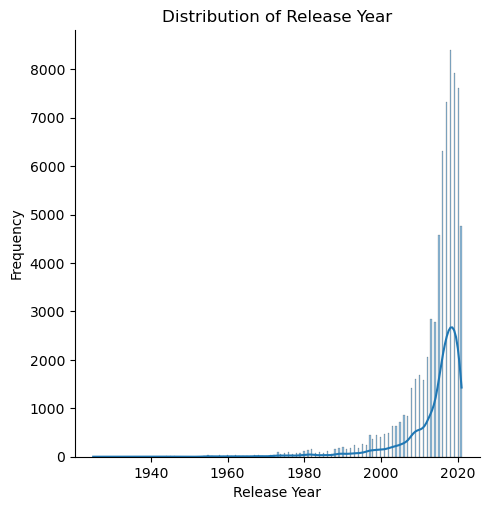

In [132]:
sns.displot(df_final, x='release_year', kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [133]:
#histplot

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


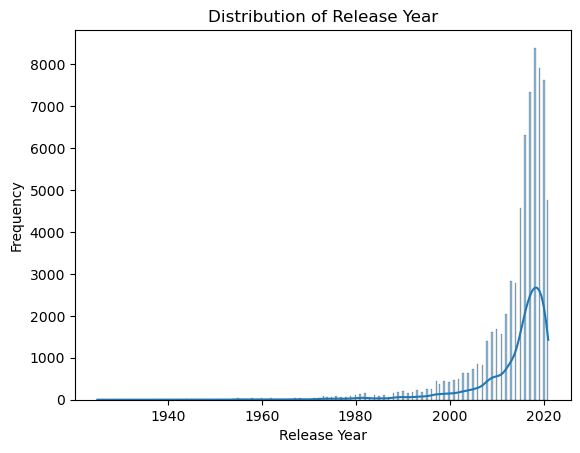

In [134]:
sns.histplot(df_final['release_year'], kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


In [135]:
#since year has many values so grouping for better visible and easy understandings

In [136]:
bins = [1995, 2000, 2005, 2010, 2015, 2020, 2025]
labels = ['1995-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2025']

df_final['year_bins'] = pd.cut(df_final['release_year'], bins=bins, labels=labels, right=False)
# Plot the count plot
plt.figure(figsize=(6,3))
sns.countplot(x='year_bins', data=df_final)
plt.title('Count of Movies by Binned Release Years')
plt.xlabel('Release Year Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [137]:
#countplot

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


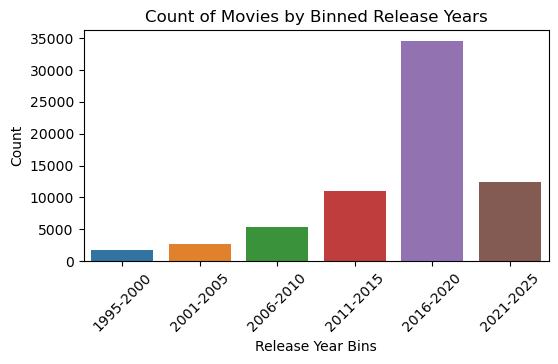

In [138]:
# Plot the count plot
plt.figure(figsize=(6,3))
sns.countplot(x='year_bins', data=df_final)
plt.title('Count of Movies by Binned Release Years')
plt.xlabel('Release Year Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [139]:
#4.2 For categorical variable(s): Boxplot

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


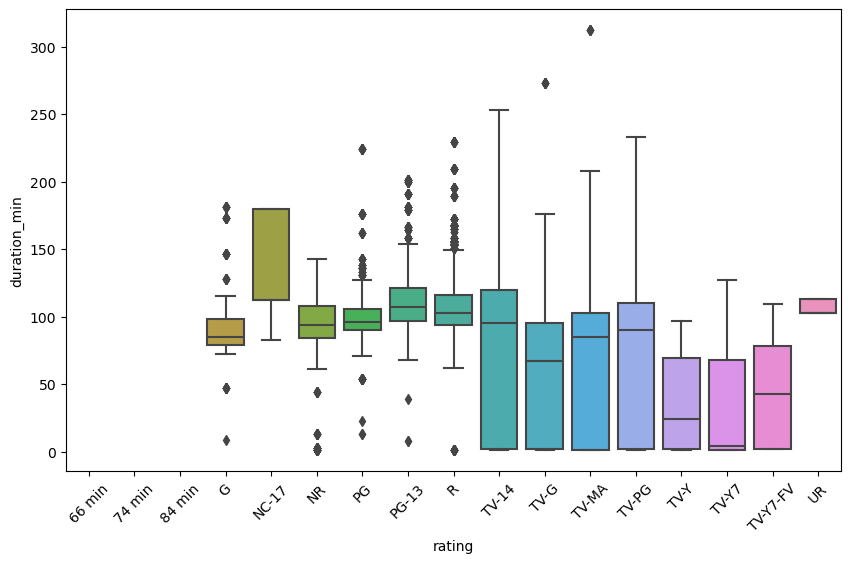

In [140]:
df_final['duration_min'] = df_final['duration'].str.extract('(\d+)').astype(float)

# Plot the box plot for 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='duration_min', data=df_final)
plt.xticks(rotation=45)
plt.show()

In [141]:
#4.3 For correlation: Heatmaps, Pairplots

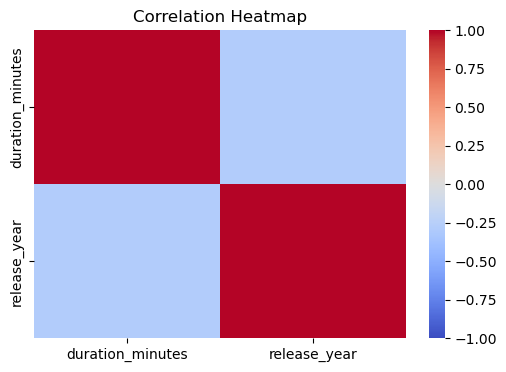

In [146]:
#correlation map
df_final['duration_minutes'] = df_final['duration'].str.extract('(\d+)').astype(float)

# Prepare the relevant numerical columns
numerical_columns = ['duration_minutes', 'release_year']

# Compute the correlation matrix
correlation_matrix = df_final[numerical_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

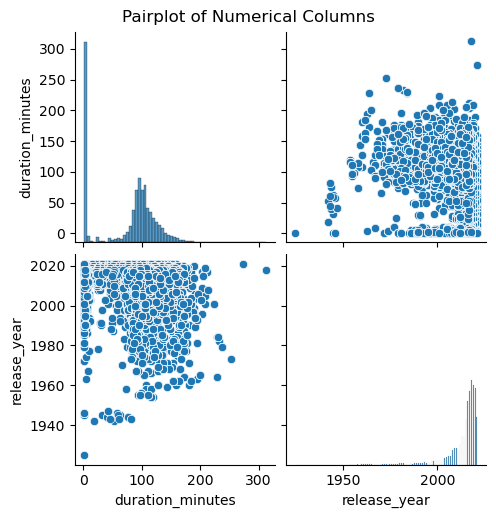

In [147]:
# Create pairplot for numerical columns
plt.figure(figsize=(10,8))
sns.pairplot(df_final[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

In [ ]:
5 # Missing Value & Outlier check (Treatment optional)

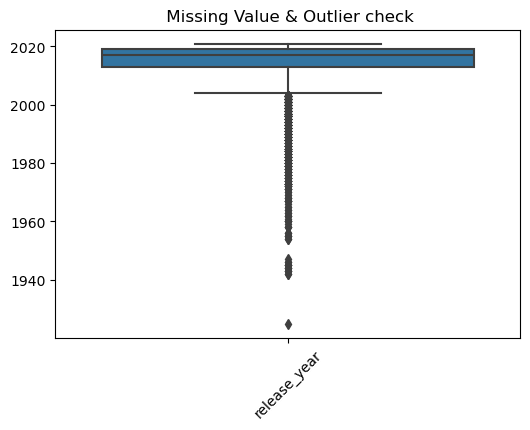

In [145]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df)
plt.title(' Missing Value & Outlier check')
plt.xticks(rotation=45)
plt.show()

In [69]:
df_final

,title,director,cast,show_id,type,country,date_added,release_year,rating,duration,description,year_bins,duration_min,duration_minutes
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,s1,Movie,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021-2025,90.0,90.0
1,Blood & Water,Unknown director,Ama Qamata,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-2025,2.0,2.0
2,Blood & Water,Unknown director,Khosi Ngema,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-2025,2.0,2.0
3,Blood & Water,Unknown director,Gail Mabalane,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-2025,2.0,2.0
4,Blood & Water,Unknown director,Thabang Molaba,s2,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-2025,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2016-2020,111.0,111.0
70808,Zubaan,Mozez Singh,Meghna Malik,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2016-2020,111.0,111.0
70809,Zubaan,Mozez Singh,Malkeet Rauni,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2016-2020,111.0,111.0
70810,Zubaan,Mozez Singh,Anita Shabdish,s8807,Movie,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2016-2020,111.0,111.0
